In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# loading the dataset
karlo_df = pd.read_csv("/teamspace/studios/this_studio/Fertiliser_Modelling/data/All_karlo_cleaned_no_missing_soil_data_with_fertility_status2.csv")

# Preview the first 10 rows
karlo_df.head(20)

,id,lab_No,lab_No_Year,county,year,project_Name,soil_depth_cm,soil_pH,soil_pH_Class,total_Nitrogen_percent_,total_Nitrogen_percent_Class,total_Org_Carbon_percent_,total_Org_Carbon_percent_Class,phosphorus_Olsen_ppm,phosphorus_Olsen_ppm_Class,potassium_meq_percent_,potassium_meq_percent_Class,calcium_meq_percent_,calcium_meq_percent_Class,magnesium_meq_percent_,magnesium_meq_percent_Class,manganese_meq_percent_,manganese_meq_percent_Class,copper_ppm,copper_ppm_Class,iron_ppm,iron_ppm_Class,zinc_ppm,zinc_ppm_Class,sodium_meq_percent_,sodium_meq_percent_Class,gps_tagged_from,data_source,crop,fertilizer_Recommendation,soilfertilitystatus
0,1,1,11-Jan,Embu,2011.0,Individual,top,6.75,slight acid,0.13,low,1.1,low,53,high,0.46,high,4.8,adequate,5.93,high,2.03,adequate,2.83,adequate,26.5,adequate,5,adequate,0.44,adequate,no gps,NARL 3 GB Data,"Snow peas, french beans, broad beans",Both fields have similar soil fertility condit...,Moderately Healthy
1,2,2,11-Feb,Embu,2011.0,Individual,top,5.58,medium acid,0.1,low,0.82,low,102,high,1.42,high,5.8,adequate,4.25,high,1.64,adequate,4.67,adequate,11.4,adequate,2.75,low,0.26,adequate,no gps,NARL 3 GB Data,"Snow peas, french beans, broad beans",Both fields have similar soil fertility condit...,Moderately Healthy
2,3,100,100/2011,Narok,2011.0,Individual,0-20,6.47,slight acid,0.19,low,1.79,moderate,24,low,1.64,high,7.5,adequate,5.01,high,0.97,adequate,0.84,low,34.8,adequate,46.9,adequate,0.23,adequate,no gps,NARL 3 GB Data,Wheat,The soil pH is satisfactory for crops' growth....,Poor
3,4,101,101/2011,Narok,2011.0,Individual,top,6.36,slight acid,0.16,low,1.42,moderate,23,low,1.40,high,6.2,adequate,5.54,high,1,adequate,1.46,adequate,71.2,adequate,33.2,adequate,0.49,adequate,no gps,NARL 3 GB Data,Missing,The soil pH is satisfactory for crops' growth....,Poor
4,5,102,102/2011,Narok,2011.0,Individual,top,6.26,slight acid,0.19,low,1.85,moderate,21,low,1.70,high,6.8,adequate,3.98,high,0.97,adequate,0.96,low,40,adequate,43.7,adequate,0.47,adequate,no gps,NARL 3 GB Data,Wheat,The soil pH is satisfactory for crops' growth....,Poor
5,6,103,103/2011,Mombasa,2011.0,Individual,top,6.26,slight acid,0.06,low,0.41,low,18,low,0.40,high,4.6,adequate,3.81,high,0.61,adequate,1.33,adequate,29.3,adequate,2.37,low,0.49,adequate,no gps,NARL 3 GB Data,"Tomato, capsicum",The soil reaction (pH) is satisfactory for cro...,Poor
6,7,1035,1035/2011,Kakamega,2011.0,Individual,0-30,5.5,medium acid,0.21,adequate,1.29,low,11,low,0.12,low,0.1,low,1.06,adequate,2.34,high,8.43,adequate,13.6,adequate,9.36,adequate,0.07,adequate,no gps,NARL 3 GB Data,Sorghum,The soil pH is satisfactory for crops' growth....,Other
7,8,1036,1036/2011,Kakamega,2011.0,Individual,30-60,5.75,medium acid,0.16,low,0.82,low,12,low,0.10,low,0.1,low,0.64,low,3.07,high,8.71,adequate,13.9,adequate,3.46,low,0.05,adequate,no gps,NARL 3 GB Data,Sorghum,The soil pH is satisfactory for crops' growth....,Very Poor
8,9,1037,1037/2011,Kakamega,2011.0,Individual,60-90,6.17,slight acid,0.11,low,0.35,low,10,low,0.10,low,0.3,low,0.81,low,2.29,high,5.94,adequate,31.8,adequate,1.94,low,0.07,adequate,no gps,NARL 3 GB Data,Sorghum,The soil pH is satisfactory for crops' growth....,Very Poor
9,10,1038,1038/2011,Kakamega,2011.0,Individual,0-30,5.14,medium acid,0.17,low,1.14,low,9,low,0.12,low,0.9,low,0.84,low,2.4,high,8.61,adequate,15.4,adequate,8.37,adequate,0.07,adequate,no gps,NARL 3 GB Data,Sorghum,The soil pH is satisfactory for crops' growth....,Very Poor


In [3]:
karlo_df['total_Nitrogen_percent_Class'].value_counts()

total_Nitrogen_percent_Class
low         50406
adequate    16743
Missing      7673
high          678
Name: count, dtype: int64

In [4]:
karlo_df['soilfertilitystatus'].value_counts()

soilfertilitystatus
Other                 26452
Poor                  22128
Moderately Healthy    20658
Very Poor              5966
Healthy                 296
Name: count, dtype: int64

### Data Cleaning and Wrangling

In [5]:
karlo_df.isna().sum()

id                                0
lab_No                            0
lab_No_Year                       0
county                            0
year                              0
project_Name                      0
soil_depth_cm                     0
soil_pH                           0
soil_pH_Class                     0
total_Nitrogen_percent_           0
total_Nitrogen_percent_Class      0
total_Org_Carbon_percent_         0
total_Org_Carbon_percent_Class    0
phosphorus_Olsen_ppm              0
phosphorus_Olsen_ppm_Class        0
potassium_meq_percent_            0
potassium_meq_percent_Class       0
calcium_meq_percent_              0
calcium_meq_percent_Class         0
magnesium_meq_percent_            0
magnesium_meq_percent_Class       0
manganese_meq_percent_            0
manganese_meq_percent_Class       0
copper_ppm                        0
copper_ppm_Class                  0
iron_ppm                          0
iron_ppm_Class                    0
zinc_ppm                    

In [6]:
karlo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75500 entries, 0 to 75499
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75500 non-null  int64  
 1   lab_No                          75500 non-null  object 
 2   lab_No_Year                     75500 non-null  object 
 3   county                          75500 non-null  object 
 4   year                            75500 non-null  float64
 5   project_Name                    75500 non-null  object 
 6   soil_depth_cm                   75500 non-null  object 
 7   soil_pH                         75500 non-null  object 
 8   soil_pH_Class                   75500 non-null  object 
 9   total_Nitrogen_percent_         75500 non-null  object 
 10  total_Nitrogen_percent_Class    75500 non-null  object 
 11  total_Org_Carbon_percent_       75500 non-null  object 
 12  total_Org_Carbon_percent_Class  

In [7]:
karlo_df.duplicated().sum()

0

In [8]:
# Drop rows with the other soil fertility status
karlo_df = karlo_df[karlo_df['soilfertilitystatus'] != 'Other']
karlo_df['soilfertilitystatus'].value_counts()

soilfertilitystatus
Poor                  22128
Moderately Healthy    20658
Very Poor              5966
Healthy                 296
Name: count, dtype: int64

In [9]:
karlo_df.shape

(49048, 36)

In [10]:
# Function to convert object columns to categorical
def convert_objects_to_categorical(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    return df

# Convert object columns to categorical
karlo_clean = convert_objects_to_categorical(karlo_df)

In [11]:
karlo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49048 entries, 0 to 68238
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              49048 non-null  int64   
 1   lab_No                          49048 non-null  category
 2   lab_No_Year                     49048 non-null  category
 3   county                          49048 non-null  category
 4   year                            49048 non-null  float64 
 5   project_Name                    49048 non-null  category
 6   soil_depth_cm                   49048 non-null  category
 7   soil_pH                         49048 non-null  category
 8   soil_pH_Class                   49048 non-null  category
 9   total_Nitrogen_percent_         49048 non-null  category
 10  total_Nitrogen_percent_Class    49048 non-null  category
 11  total_Org_Carbon_percent_       49048 non-null  category
 12  total_Org_Carbon_percen

### Data Preparation

In [12]:
from api.preprocessing import SoilDataPreprocessor

In [13]:
# Initialize the preprocessor
# During training phase
preprocessor = SoilDataPreprocessor()

# Fit and transform training data
train_data_processed = preprocessor.fit_transform(
    karlo_clean, 
    target_column='soilfertilitystatus',
    encoding_type='label',
    scaling_type='standard',
    apply_smote=True
)

2025-05-30 06:50:22,755 - SoilDataPreprocessor - INFO - SoilDataPreprocessor initialized
2025-05-30 06:50:22,756 - SoilDataPreprocessor - INFO - ============================================================
2025-05-30 06:50:22,757 - SoilDataPreprocessor - INFO - Starting fit_transform process
2025-05-30 06:50:22,758 - SoilDataPreprocessor - INFO - Parameters - encoding: label, scaling: standard, SMOTE: True
2025-05-30 06:50:22,759 - SoilDataPreprocessor - INFO - Input DataFrame shape: (49048, 36)
2025-05-30 06:50:22,760 - SoilDataPreprocessor - INFO - Target column: soilfertilitystatus
2025-05-30 06:50:22,761 - SoilDataPreprocessor - INFO - Target column data type: category
2025-05-30 06:50:22,762 - SoilDataPreprocessor - INFO - Target classes: ['Moderately Healthy', 'Poor', 'Very Poor', 'Healthy']
Categories (4, object): ['Healthy', 'Moderately Healthy', 'Poor', 'Very Poor']
2025-05-30 06:50:22,763 - SoilDataPreprocessor - INFO - ----------------------------------------
2025-05-30 06:5

In [14]:
# saving the preprocessor
preprocessor.save('models/all_karlo_data_soil_fertility_status_preprocessor.joblib')

2025-05-30 06:50:32,126 - SoilDataPreprocessor - INFO - Saving preprocessor to: models/all_karlo_data_soil_fertility_status_preprocessor.joblib
2025-05-30 06:50:32,192 - SoilDataPreprocessor - INFO - Preprocessor saved successfully


In [15]:
train_data_processed['soilfertilitystatus'].value_counts()

soilfertilitystatus
1    22128
2    22128
3    22128
0    22128
Name: count, dtype: int64

In [16]:
train_data_processed.sample(20)

,id,lab_No,lab_No_Year,county,year,project_Name,soil_depth_cm,soil_pH,soil_pH_Class,total_Nitrogen_percent_,total_Nitrogen_percent_Class,total_Org_Carbon_percent_,total_Org_Carbon_percent_Class,phosphorus_Olsen_ppm,phosphorus_Olsen_ppm_Class,potassium_meq_percent_,potassium_meq_percent_Class,calcium_meq_percent_,calcium_meq_percent_Class,magnesium_meq_percent_,magnesium_meq_percent_Class,manganese_meq_percent_,manganese_meq_percent_Class,copper_ppm,copper_ppm_Class,iron_ppm,iron_ppm_Class,zinc_ppm,zinc_ppm_Class,sodium_meq_percent_,sodium_meq_percent_Class,gps_tagged_from,data_source,crop,fertilizer_Recommendation,soilfertilitystatus
86023,51406,6833,15258,24,1.156051,0,158,257,3,33,1,331,3,387,1,-0.218792,1,93,1,774,7,153,3,499,4,1063,1,117,3,74,1,1,0,3477,5407,3
84721,31628,11525,33740,33,0.014201,0,158,183,5,20,1,213,3,707,1,-0.196349,1,418,1,230,5,38,3,508,4,943,1,484,1,24,1,0,0,1124,8488,3
25951,35061,11835,34967,70,0.299663,0,158,249,3,22,1,151,3,257,1,0.010693,0,167,1,279,4,73,3,134,4,2274,1,893,3,24,1,1,0,2603,1175,2
81235,14758,10737,30968,23,-0.833337,0,158,392,4,2,1,2,2,87,1,-0.210404,1,14,2,139,4,14,3,70,6,3352,2,139,3,14,1,1,0,2200,18709,3
61564,3461,11698,34442,35,-0.781530,0,158,448,7,22,0,180,3,1019,0,0.100295,0,65,1,485,7,70,3,942,4,2165,1,781,3,95,1,1,0,3014,10489,0
21849,29578,10171,28599,67,0.870588,0,158,287,3,10,1,67,2,451,1,-0.138895,0,408,1,426,7,46,3,723,4,420,1,176,3,52,1,1,0,2136,292,2
25840,34949,7042,16317,43,0.299663,0,158,203,3,22,1,141,3,1011,0,-0.066871,0,165,1,146,4,75,3,703,4,2076,1,1290,1,17,1,1,0,2010,8598,1
83853,36222,8292,21147,28,0.299663,0,158,285,3,11,1,63,2,72,1,-0.177677,1,158,1,427,7,32,3,142,4,420,1,1311,1,41,1,1,0,4403,16741,3
74134,61335,11864,35079,45,1.726976,0,158,170,5,27,1,523,0,76,1,-0.203433,1,480,1,722,3,221,3,1086,3,3216,1,1378,1,402,0,0,0,3297,11779,3
58488,415,4722,9389,52,-1.413111,0,158,362,4,64,0,146,2,782,0,0.117567,0,83,1,581,6,152,3,219,4,2404,1,667,1,131,1,1,0,3870,6511,0


In [ ]:
from sklearn.model_selection import train_test_split

X = train_data_processed.drop(columns=['soilfertilitystatus', 'crop', 'fertilizer_Recommendation'])
y = train_data_processed['soilfertilitystatus']

print(f"X columns used: \n", X.columns)
print(f"\ny target columns:", y.name)

# splitting the dataset into train , test and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

X columns used: 
 Index(['id', 'lab_No', 'lab_No_Year', 'county', 'year', 'project_Name',
       'soil_depth_cm', 'soil_pH', 'soil_pH_Class', 'total_Nitrogen_percent_',
       'total_Nitrogen_percent_Class', 'total_Org_Carbon_percent_',
       'total_Org_Carbon_percent_Class', 'phosphorus_Olsen_ppm',
       'phosphorus_Olsen_ppm_Class', 'potassium_meq_percent_',
       'potassium_meq_percent_Class', 'calcium_meq_percent_',
       'calcium_meq_percent_Class', 'magnesium_meq_percent_',
       'magnesium_meq_percent_Class', 'manganese_meq_percent_',
       'manganese_meq_percent_Class', 'copper_ppm', 'copper_ppm_Class',
       'iron_ppm', 'iron_ppm_Class', 'zinc_ppm', 'zinc_ppm_Class',
       'sodium_meq_percent_', 'sodium_meq_percent_Class', 'gps_tagged_from',
       'data_source'],
      dtype='object')

y target columns: soilfertilitystatus


In [39]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# model metrics libraries

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [19]:
# OneVsRestClassifier with LinearSVC 

# Initialize the OneVsRestClassifier with LinearSVC
OvR_clf = OneVsRestClassifier(LinearSVC(random_state=42, dual=False, max_iter=5000))

# Fit the model on the training data
OvR_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_ovr_clf = OvR_clf.predict(X_test)

In [20]:
# Model Evaluation for Logistic Regression
print("Multiclass with OneVsRest:")

# Accuracy is the ratio of correctly predicted observation to the total observations.
print(f"Accuracy: {accuracy_score(y_test, y_pred_ovr_clf):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_ovr_clf, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_ovr_clf, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
print(f"F1 Score: {f1_score(y_test, y_pred_ovr_clf, average='macro'):.4f}")

Multiclass with OneVsRest:
Accuracy: 0.9676
Precision: 0.9691
Recall: 0.9672
F1 Score: 0.9669


In [21]:
print("Classification report:\n", classification_report(y_test, y_pred_ovr_clf))

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5600
           1       0.95      0.99      0.97      5604
           2       1.00      0.88      0.94      5450
           3       0.94      1.00      0.97      5474

    accuracy                           0.97     22128
   macro avg       0.97      0.97      0.97     22128
weighted avg       0.97      0.97      0.97     22128



In [47]:
# Perform cross-validation
cv_scores = cross_val_score(OvR_clf, X, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.97492092 0.95910529 0.95390351 0.92814371 0.82962377 0.93853802
 0.88193424 0.83391707 0.92633601 0.86950627]
Mean accuracy: 0.909592881864097


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

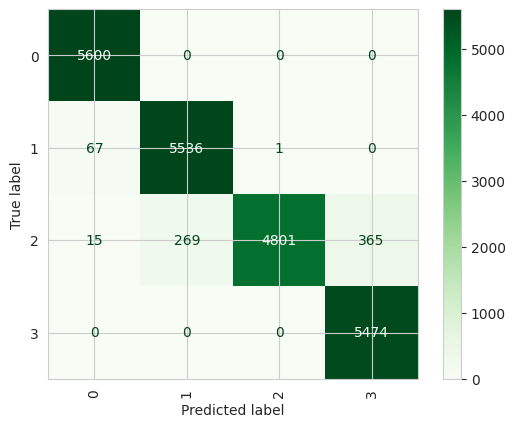

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_ovr_clf, labels=OvR_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=OvR_clf.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
# plot_path = 'eda_charts/models_evals/one_versus_rest_confusion_matrix.png'
# plt.savefig(plot_path)


In [24]:
# Save the model to a file
import joblib

# joblib.dump(OvR_clf, 'models/Soil_Status_OneVsRest_Classifier_model.joblib')
# print("OneVsRestClassifier models saved to: models/Soil_Status_OneVsRest_Classifier_model")

In [25]:
# decision trees
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier()

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = dtree.predict(X_test)

In [26]:
print("Multiclass with Decision tree classifier:")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_tree, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_tree, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall.
print(f"F1 Score: {f1_score(y_test, y_pred_tree, average='macro'):.4f}")

Multiclass with Decision tree classifier:
Accuracy: 0.9997
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997


In [27]:
print("Classification report:\n", classification_report(y_test, y_pred_tree))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5600
           1       1.00      1.00      1.00      5604
           2       1.00      1.00      1.00      5450
           3       1.00      1.00      1.00      5474

    accuracy                           1.00     22128
   macro avg       1.00      1.00      1.00     22128
weighted avg       1.00      1.00      1.00     22128



In [46]:
# Perform cross-validation
cv_scores = cross_val_score(dtree, X, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.99977406 1.         0.99977404 0.99988702 1.         1.
 1.         0.99977404 0.99988702 0.99728844]
Mean accuracy: 0.9996384614838736


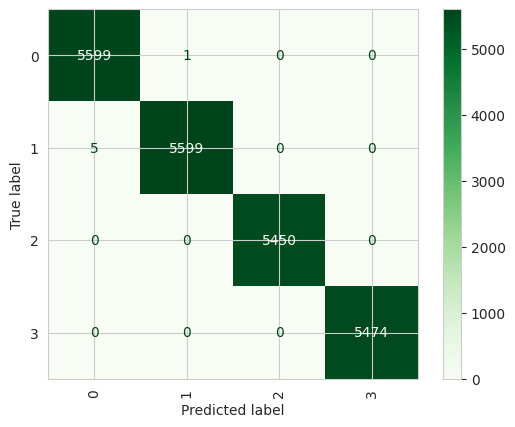

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_tree, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# Saving the plot
# plot_path = 'eda_charts/models_evals/decision_tree_confusion_matrix.png'
# plt.savefig(plot_path)

plt.show()

In [ ]:
# # Save the model to a file
# joblib.dump(dtree, 'models/Soil_Status_decisionTree_Classifier_model.joblib')

# print("Decision Tree Classifier models saved to: models/Soil_Status_decisionTree_Classifier_model")

In [29]:
# Random forest classifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=142)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf.predict(X_test)

In [30]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall.
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")


Random Forest:
Accuracy: 0.9997740419378164
Precision: 0.9998
Recall: 0.9998
F1 Score: 0.9998


In [31]:
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5600
           1       1.00      1.00      1.00      5604
           2       1.00      1.00      1.00      5450
           3       1.00      1.00      1.00      5474

    accuracy                           1.00     22128
   macro avg       1.00      1.00      1.00     22128
weighted avg       1.00      1.00      1.00     22128



In [45]:
# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [1.         0.99988703 0.99977404 1.         0.99887018 0.99988702
 0.99966106 1.         0.99954807 0.99525477]
Mean accuracy: 0.9992882172971281


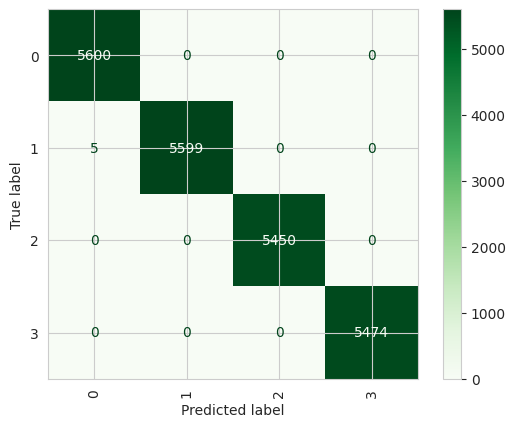

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# # Saving the plot
# plot_path = 'eda_charts/models_evals/random_forest_confusion_matrix.png'
# plt.savefig(plot_path)

plt.show()

In [33]:
# # Save the model to a file
# joblib.dump(rf, "models/Soil_Status_randomForest_Classifier_Model.joblib")

# print("Random Forest Classifier saved to: models/Soil_Status_randomForest_Classifier")

In [34]:
from xgboost import XGBClassifier

In [35]:
# xg boost
# initialise the model
xgb = XGBClassifier(random_state=142)

# Fit the model
xgb.fit(X_train, y_train)

# predict the test set
y_pred_xgb = xgb.predict(X_test)

In [36]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

# Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='macro'):.4f}")

# Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='macro'):.4f}")

# F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall.
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='macro'):.4f}")


Gradient Boosting Machine (XGBoost):
Accuracy: 0.9998
Precision: 0.9998
Recall: 0.9998
F1 Score: 0.9998


In [37]:
print("Classification report:\n", classification_report(y_test, y_pred_xgb))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5600
           1       1.00      1.00      1.00      5604
           2       1.00      1.00      1.00      5450
           3       1.00      1.00      1.00      5474

    accuracy                           1.00     22128
   macro avg       1.00      1.00      1.00     22128
weighted avg       1.00      1.00      1.00     22128



In [44]:
# Perform cross-validation
cv_scores = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [1.         1.         1.         1.         0.99943509 0.99977404
 1.         1.         0.99977404 0.99728844]
Mean accuracy: 0.9996271607727939


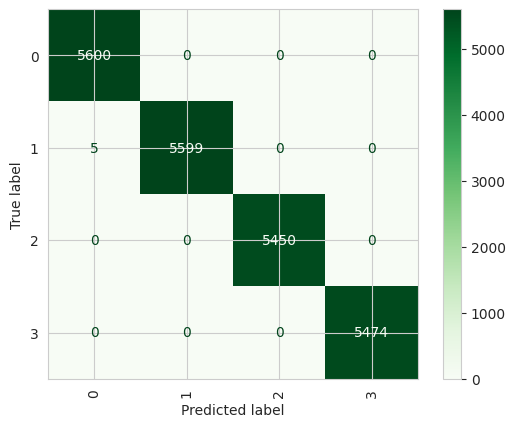

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)

# # Saving the plot
# plot_path = 'eda_charts/models_evals/xgboost_confusion_matrix.png'
# plt.savefig(plot_path)

plt.show()

In [ ]:
# # Save the model to a file
# joblib.dump(rf, "models/Soil_Status_xgb_Model.joblib")

# print("Gradient Boosting Classifier saved to: models/Soil_Status_xgb_Classifier")